In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

### Read the data

In [3]:
h_rate = pd.read_excel('D:/Assignments/working/Decision Tree/Decision Tree/heart_disease.xlsx')  # import the dataset

In [4]:
h_rate                     # print dataset values

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [5]:
h_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder         # assigned LabelEncoder class to convert object values

In [7]:
label_cols = ['sex','cp','restecg','slope','thal','oldpeak']       # object variables taken to convert the numerical values

In [8]:
for col in label_cols:                                # created for loop to convert object variales in dataset
    le = LabelEncoder()
    h_rate[col] = le.fit_transform(h_rate[col])       # LabelEncoder is applied to object variables

In [9]:
h_rate['exang'] = h_rate['exang'].replace({'FALSE':False,'TURE':True}).astype(int)    # exang column converts to integer values as 0 or 1

In [10]:
h_rate['fbs'] = h_rate['fbs'].astype(int)

In [11]:
h_rate.rename(columns={'age':'Age', 'sex':'Sex','cp':'CP','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg',
                       'thalch':'Thalch','exang':'Exang', 'oldpeak':'Oldpeak','slope':'Slope','thal':'Thal','num':'Num'},inplace=True)

In [12]:
h_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       908 non-null    int64
 1   Sex       908 non-null    int64
 2   CP        908 non-null    int64
 3   Trestbps  908 non-null    int64
 4   Chol      908 non-null    int64
 5   Fbs       908 non-null    int64
 6   Restecg   908 non-null    int64
 7   Thalch    908 non-null    int64
 8   Exang     908 non-null    int64
 9   Oldpeak   908 non-null    int64
 10  Slope     908 non-null    int64
 11  Thal      908 non-null    int64
 12  Num       908 non-null    int64
dtypes: int64(13)
memory usage: 92.3 KB


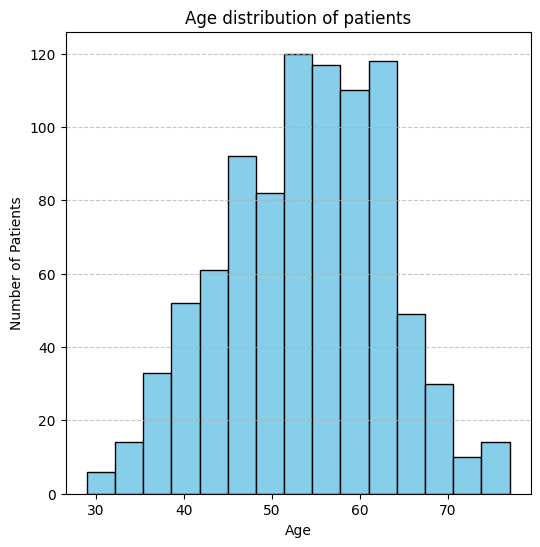

In [13]:
plt.figure(figsize=(6,6))
plt.hist(h_rate['Age'],bins=15,color='skyblue',edgecolor='black')
plt.title('Age distribution of patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# this histogram shows more number of patients lies age from 53 to 63

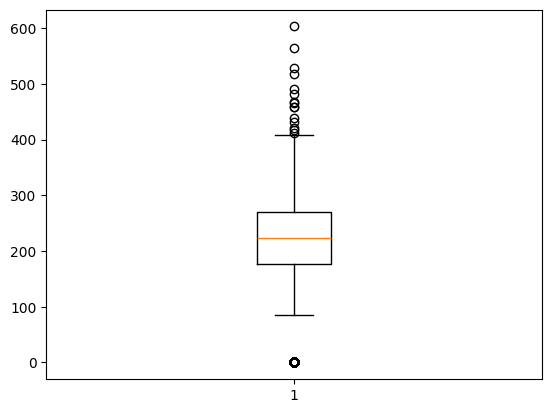

In [15]:
plt.boxplot(h_rate['Chol'])
plt.show()

In [16]:
# boxplot shows 50% cholesterol rate from 180 to 270, some of outliers are in the data from 400 and above

## Correlation Analysis

In [17]:
corr = h_rate.corr()  # correlation analysis function called to analyse relationship of each variables
corr

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Thal,Num
Age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.192634,0.277346,-0.054644,0.032058,0.326493
Sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.187388,0.168424,-0.045065,0.030414,0.259605
CP,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.343597,-0.095888,0.092177,-0.057881,-0.312848
Trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.151984,0.226197,0.006748,0.009090,0.137251
Chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.037019,-0.014198,0.047292,0.009299,-0.238813
Fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.027807,0.125154,-0.026636,-0.038814,0.156268
Restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.085640,0.098979,-0.084796,-0.103614,0.036508
Thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.349191,-0.214560,0.224048,-0.038263,-0.323058
Exang,0.192634,0.187388,-0.343597,0.151984,-0.037019,0.027807,0.085640,-0.349191,1.000000,0.372821,-0.161810,0.075182,0.359549
Oldpeak,0.277346,0.168424,-0.095888,0.226197,-0.014198,0.125154,0.098979,-0.214560,0.372821,1.000000,-0.136802,-0.048085,0.380900


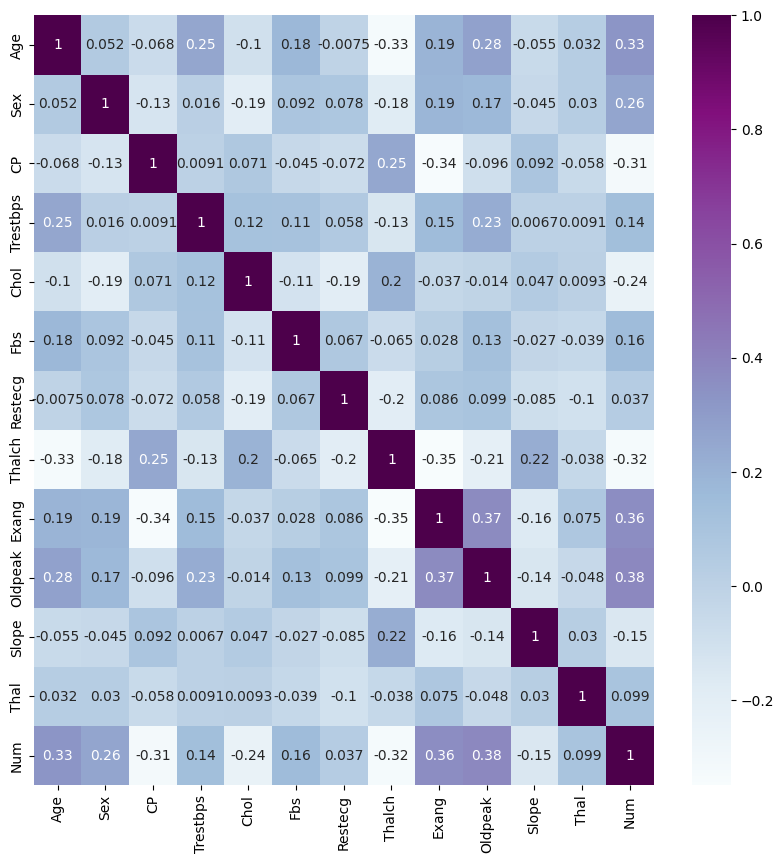

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='BuPu', annot=True)   # heatmap we used here to shows values of each variable's relations.
plt.show()

In [19]:
# heatmap shows the correlation of variables are moderate positive/negative correlation.

## Split the model

In [20]:
from sklearn.model_selection import train_test_split        # train_test_split from sklearn library is assign to splitting the dataset

In [21]:
X = h_rate.iloc[:,:12]               # from h_rate dataset, first 11 columns taken as X values 

In [22]:
X.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalch,Exang,Oldpeak,Slope,Thal
0,63,1,3,145,233,1,0,150,0,33,0,0
1,41,1,1,135,203,0,1,132,0,10,1,0
2,57,1,0,140,192,0,1,148,0,14,1,0
3,52,1,3,118,186,0,0,190,0,10,1,0
4,57,1,0,110,201,0,1,126,1,25,1,0


In [23]:
y = h_rate.iloc[:,12]           # last column taken as y value which target value

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Num, dtype: int64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)     # assigned train and test data

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape        # printed train and test dataset shapes

((726, 12), (182, 12), (726,), (182,))

## Hyperparameter Tuning

In [27]:
from scipy.stats import randint                       # import random integer class from stats library
from sklearn.tree import DecisionTreeClassifier, plot_tree      # imports decisiontreeclassifier to classify the dataset
from sklearn.model_selection import RandomizedSearchCV      # RandomizedSearchCV class imported to hyperparameter tuning

In [28]:
param_t = {'max_depth' : (10,30,50,70,90,100),
          'max_leaf_nodes' : randint(2,49),
          'criterion':['gini','entropy']}                  # parameters are assigned to get tuned values

In [29]:
tree = DecisionTreeClassifier()                    # DecisionTreeclassifier() is assigned

In [30]:
tree_cv = RandomizedSearchCV(tree,param_t, cv=3, error_score='raise')

In [31]:
tree_cv.fit(X_train,y_train)                    # training data are fit into the model

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (10, 30, 50, 70, 90, 100),
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002058BB9F530>})

In [32]:
print('Tuned Decision Tree Parameter {}'.format(tree_cv.best_params_))    # printed the best parameters from hyperparameter tuning

Tuned Decision Tree Parameter {'criterion': 'entropy', 'max_depth': 30, 'max_leaf_nodes': 29}


## Building the model

In [33]:
classifr = DecisionTreeClassifier(max_depth=90,max_leaf_nodes =10, criterion = 'entropy',random_state=42)  # Building the decisiontreeclassification model

In [34]:
classifr.fit(X_train,y_train)              # training data is fit into classification model

DecisionTreeClassifier(criterion='entropy', max_depth=90, max_leaf_nodes=10,
                       random_state=42)

In [35]:
yhat_train=classifr.predict(X_train)           # predicted values from training data

In [36]:
from sklearn.metrics import confusion_matrix,classification_report     # importing confusion_matrix and classification_report classed to get the metrics

In [37]:
cm = confusion_matrix(y_train,yhat_train)      # get the confusion_matrix by analysing training data and predicted data

In [38]:
cm                     # prints the confusion matrix 

array([[269,  35,   0,   6,   0],
       [ 67, 136,   0,  14,   0],
       [ 17,  45,   4,  21,   0],
       [ 16,  43,   3,  28,   0],
       [  3,   6,   1,  12,   0]])

In [39]:
print(classification_report(y_train,yhat_train))        # prints the classification report

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       310
           1       0.51      0.63      0.56       217
           2       0.50      0.05      0.08        87
           3       0.35      0.31      0.33        90
           4       0.00      0.00      0.00        22

    accuracy                           0.60       726
   macro avg       0.42      0.37      0.35       726
weighted avg       0.56      0.60      0.56       726



In [40]:
yhat_test = classifr.predict(X_test)        # y's predicted value is calculated from x_test values

In [41]:
cm = confusion_matrix(y_test,yhat_test)     # confustion matrix shows test actual values and test predicted values
cm

array([[76, 12,  0,  1,  0],
       [19, 24,  1,  4,  0],
       [ 4, 12,  0,  6,  0],
       [ 5, 10,  0,  2,  0],
       [ 2,  3,  0,  1,  0]])

In [42]:
print(classification_report(y_test,yhat_test))# classification_report gives metrics like precision, f1-score, accuracy of the test values.

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        89
           1       0.39      0.50      0.44        48
           2       0.00      0.00      0.00        22
           3       0.14      0.12      0.13        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.25      0.29      0.27       182
weighted avg       0.47      0.56      0.51       182



### Visualize Tree Structure

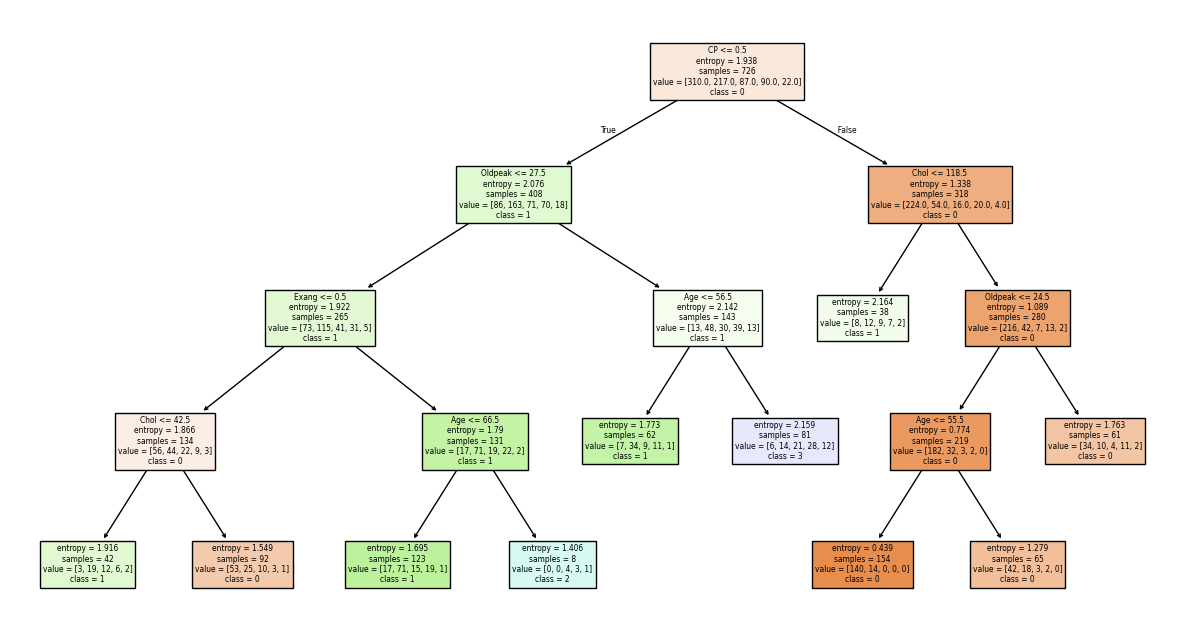

In [45]:
plt.figure(figsize=(15,8))
plot_tree(classifr,feature_names=X.columns,class_names=[str(c) for c in np.unique(y)],filled=True,max_depth=5)
plt.show()

In [46]:
# Root node -  First decision is based on CP <= 0.5 (chest pain type). From here, the tree splits into two main branches: True (left) and False (right)
# Internal nodes - Each internal node tests a condition (e.g., Oldpeak <= 2.75, Age <= 56.5).
# Depending on whether the condition is true or false, the data flows left or right.

# Leaf nodes (bottom boxes) - Final classification result (e.g., class 0, class 1, class 2, etc.).
# These are predictions the tree makes once it has split enough.

# CP (chest pain type) is the most important first split — it strongly separates patients with/without disease.
# Leaf nodes give the predicted stage of heart disease (0 = no disease, 1–4 = increasing severity)

In [47]:
# The test set accuracy is lower than the training set, this model possibly overfitting or that the model is not generalizing well.

## Interview Questions

In [48]:
# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#             Max_depth, min_samples_split, min_samples_leaf, max_features are common hyperparameters,
#    These hyperparamters are all about how complex the tree becomes in the model. 'class_weight' hyperparameter allows handling imbalanced data.
#    'min_impurity_decrease' helps avoid unnecessary split.

In [49]:
# What is the difference between the Label encoding and One-hot encoding?
#   Label encoding converts each category value into a unique integer. (ex). feature 'color' = ['red','blue','green'], red will be 0, blue will be 1, green will be 2
#   One-hot encoding converts each category into a separate binary column, where only one column is 1 and others are 0